In [1]:
#Imports
import random
import matplotlib.pyplot as plt
import json

In [2]:
#Input variables
MONEY = 8000
VACATION_DURATION = 5

In [3]:
#Calculate multiple fees based on fixed percentage from the input variables
HOTEL_PER_NIGHT_RM = int(MONEY * 0.05)
TOURIST_SPOT_NUM = int(VACATION_DURATION * 3)
TOURIST_SPOT_RM = int(MONEY * 0.06)
FOOD_MEAL_RM = int((MONEY * 0.2) / (VACATION_DURATION * 3))
TRANSPORT_FREQ_NUM = 15
TRANSPORT_TRIP_RM = int(MONEY * 0.01)

In [4]:
#[hotel star rating(rm), tourist spots(#), one tourist spot(rm), food price(rm), transport fee(rm), transport_freq(#)]

#Generate one individual randomly between a range
def generate_combination():
    combination = []
    combination.append(random.randint(int(HOTEL_PER_NIGHT_RM*0.1), HOTEL_PER_NIGHT_RM))
    combination.append(random.randint(2, TOURIST_SPOT_NUM))
    combination.append(random.randint(0, TOURIST_SPOT_RM))
    combination.append(random.randint(1, FOOD_MEAL_RM))
    combination.append(random.randint(1, TRANSPORT_FREQ_NUM))
    combination.append(random.randint(1, TRANSPORT_TRIP_RM))
    
    return combination

#Generate population according to input population size
def generate_population(size):
    population = []
    for i in range(size):
        population.append(generate_combination())
    
    return population

In [6]:
#Generate a population of 100 size
pop = generate_population(100)
pop[0]

[389, 15, 452, 45, 10, 50]

In [7]:
# fitness score to check the difference between budget and generated cost (LOWER IS BETTER)
def fitness(individual):
    cost = 0
    cost += individual[0] * VACATION_DURATION
    cost += individual[1] * individual[2]
    cost += individual[3] * VACATION_DURATION * 3
    cost += individual[4] * individual[5] * VACATION_DURATION
    
    if cost > MONEY:
        return MONEY

    return abs(MONEY-cost)

# grading function of the population
def grade(pop):
    total = 0
    for p in pop:
        f = fitness(p)
        total += f
        
    return total / len(pop)

# evolve function to produce the best option
def evolve(pop, retain=0.2, random_select=0.05, mutate=0.01): #rank selection, random mutation, single point crossover
    graded = [(fitness(x),x) for x in pop]

    graded = [x[1] for x in sorted(graded)]
    
    retain_length = int(len(graded)*retain)
    parents = graded[0:retain_length]

    # selection
    for individual in graded[retain_length:]:
        if random_select > random.random():
            parents.append(individual)

    # mutation
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = random.randint(0,len(individual)-1)
            individual[pos_to_mutate] = random.randint(min(individual),max(individual))
    
    # crossover
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = random.randint(0,parents_length) - 1
        female = random.randint(0,parents_length) - 1
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male)/2)
            child = male[:half] + female[half:]
            children.append(child)
            
    parents.extend(children)
    return parents

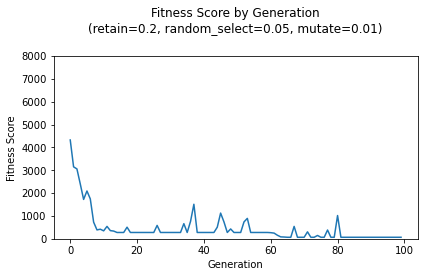

In [31]:
# With default retain=0.2, random_select=0.05, mutate=0.01

value_lst =[]
fitness_history = []
generations = 100
counter = 0
last_indv = [0,0,0,0,0,0]
last_value = -1

p = pop
for i in range(generations):
    p = evolve(p)
    value = grade(p)
    value_lst.append((p[0], value))
    fitness_history.append(value)

plt.plot(fitness_history)
plt.title('''Fitness Score by Generation
(retain=0.2, random_select=0.05, mutate=0.01)''',y=1.1)
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.tight_layout()
plt.ylim(0,MONEY)
plt.savefig('r02_rs005_m0.01.png')
plt.show()

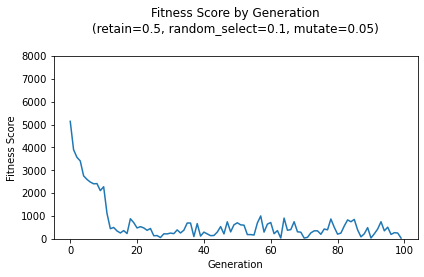

In [29]:
#With retain=0.5, random_select=0.1, mutate=0.05

value_lst =[]
fitness_history = []
generations = 100
counter = 0
last_indv = [0,0,0,0,0,0]
last_value = -1

p = pop
for i in range(generations):
    p = evolve(p, retain=0.5, random_select=0.1, mutate=0.05)
    value = grade(p)
    value_lst.append((p[0], value))
    fitness_history.append(value)

plt.plot(fitness_history)
plt.title('''Fitness Score by Generation
(retain=0.5, random_select=0.1, mutate=0.05)''',y=1.1)
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.tight_layout()
plt.ylim(0,MONEY)
plt.savefig('r05_rs01_m005.png')
plt.show()

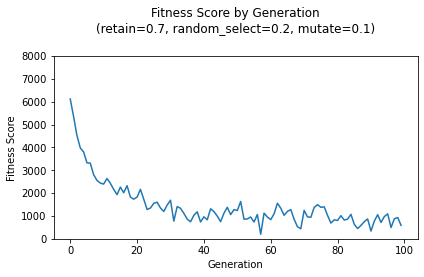

In [30]:
#With retain=0.7, random_select=0.2, mutate=0.1

value_lst =[]
fitness_history = []
generations = 100
counter = 0
last_indv = [0,0,0,0,0,0]
last_value = -1

p = pop
for i in range(generations):
    p = evolve(p, retain=0.7, random_select=0.2, mutate=0.1)
    value = grade(p)
    value_lst.append((p[0], value))
    fitness_history.append(value)

plt.plot(fitness_history)
plt.title('''Fitness Score by Generation
(retain=0.7, random_select=0.2, mutate=0.1)''',y=1.1)
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.tight_layout()
plt.ylim(0,MONEY)
plt.savefig('r07_rs02_m01.png')
plt.show()